In [1]:
from photutils import centroid_com
from ccdproc import ImageFileCollection
from reducer.image_browser import ImageBrowser
from astropy.time import Time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_location = '.'

In [3]:
data_collection = ImageFileCollection(data_location)
koi_images = (data_collection.summary['imagetyp'] == 'LIGHT') & (data_collection.summary['exposure'] == 90)
new_summary = data_collection.summary[koi_images]
del new_summary['history'], new_summary['comment']
plot_info = new_summary.group_by('file')
plot_info

file,simple,bitpix,naxis,naxis1,naxis2,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,swcreate,swserial,sitelat,sitelong,telescop,instrume,notes,flipstat,swowner,date,time-obs,ut,timesys,radecsys,purged,latitude,longitud,altitude,lst,jd-obs,mjd-obs,biassec,trimsec,bunit,trim_image,trimim,subtract_bias,subbias,subtract_dark,subdark,focusssz,focustem,objctra,objctdec,ra,dec,ha,airmass,secz,alt-obj,az-obj,cd1_1,cd1_2,cd2_1,cd2_2,a_0_0,a_0_1,a_1_0,b_0_0,b_0_1,b_1_0,wcsaxes,crpix1,crpix2,pc1_1,pc1_2,pc2_1,pc2_2,cdelt1,cdelt2,cunit1,cunit2,ctype1,ctype2,crval1,crval2,lonpole,latpole,radesys,equinox,bp_0_0,bp_0_1,bp_0_2,b_1_1,b_2_0,a_order,b_0_2,b_order,bp_order,ap_order,a_1_1,bp_2_0,ap_2_0,a_0_2,bp_1_1,bp_1_0,a_2_0,ap_1_0,ap_1_1,ap_0_1,ap_0_0,ap_0_2,object,flat_correct,flatcor,master
str37,bool,int32,int32,int32,int32,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str10,object,str5,float64,float64,float64,str34,str32,str13,str14,str1,str9,str1,str1,str10,object,object,object,object,object,bool,str13,str14,float64,str13,float64,float64,str11,str11,str3,str6,str13,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
Koi-0732-b-0001r90.fit,True,-32,2,4096,4096,2018-06-28T04:05:03,90.0,90.0,-20.0,-20.053935000000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,+46:52:00.408,-96:27:11.8008,,AspenCG16,,,Matt Craig,2018-06-28T17:03:56,--,--,--,--,True,+46:52:00.408,-96:27:11.8008,311.7999999995668,16:04:04.3815,2458297.670173611,58297.17017361111,[4096:4109],"[1:4096, :]",adu,trimim,ccd=<CCDData>,subbias,"ccd=<CCDData>, master=<CCDData>",subdark,"ccd=<CCDData>, master=<CCDData>, exposure_time=exposure, exposure_unit=s, scale=True",6.201171874993303,0.0,15:02:39,+44:50:37,19:12:42.5314,47:20:33.4836,1:01:25.3815,1.018,1.018,79.22776,264.36181,0.000152764015009,-3.33756750758e-05,3.33704673057e-05,0.000152745560429,0,0,0,0,0,0,2,2055.0,2048.5,0.000152764015009,-3.33756750758e-05,3.33704673057e-05,0.000152745560429,1.0,1.0,deg,deg,RA---TAN-SIP,DEC--TAN-SIP,288.179063251,47.3420278368,180.0,47.3420278368,FK5,2000.0,1.92241210976e-07,1.81809725969e-07,1.78807325493e-07,-6.03614818293e-08,1.4045275975e-08,2,-1.78807470033e-07,2,2,2,-7.46410981999e-08,-1.40452847997e-08,-5.86870659091e-09,-9.74897870781e-08,6.0361438003e-08,4.91859797531e-08,5.86869723209e-09,4.15043669896e-08,7.4641056929e-08,1.13876631912e-07,1.31934507356e-07,9.74896942441e-08,koi -0732,flatcor,"ccd=<CCDData>, flat=<CCDData>",--
Koi-0732-b-0002r90.fit,True,-32,2,4096,4096,2018-06-28T04:06:53,90.0,90.0,-20.0,-20.06336475,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,+46:52:00.408,-96:27:11.8008,,AspenCG16,,,Matt Craig,2018-06-28T17:04:03,--,--,--,--,True,+46:52:00.408,-96:27:11.8008,311.7999999995668,16:05:54.6826,2458297.671446759,58297.17144675926,[4096:4109],"[1:4096, :]",adu,trimim,ccd=<CCDData>,subbias,"ccd=<CCDData>, master=<CCDData>",subdark,"ccd=<CCDData>, master=<CCDData>, exposure_time=exposure, exposure_unit=s, scale=True",6.201171874993303,0.0,15:02:39,+44:50:37,19:12:42.5333,47:20:32.8373,1:03:15.6826,1.019,1.019,78.91493,264.85019,0.00015276589815,-3.33713856441e-05,3.33765831718e-05,0.000152746840686,0,0,0,0,0,0,2,2055.0,2048.5,0.00015276589815,-3.33713856441e-05,3.33765831718e-05,0.000152746840686,1.0,1.0,deg,deg,RA---TAN-SIP,DEC--TA

In [4]:
centroids = []
dates = []
backcenters = []

data_sum = 0
mid_sum = 0
middle = []
for image, fname in data_collection.hdus(imagetyp='LIGHT', return_fname=True):
    if fname not in plot_info['file']:
        continue
    date_obs = Time(image.header['date-obs'], scale='utc')
    data = (image.data[1660:1741, 170:261])
    data_mid = image.data[1670:1731, 180:251]
    center_of_star = centroid_com(data)
    data_sum += data
    mid_sum += data_mid
    backpix = (data.sum() - data_mid.sum()) / (data.size - data_mid.size)
    backsub = data - backpix
    mask = backsub < 0
    backcenter = centroid_com(backsub, mask=mask)
    centroids.append(center_of_star)
    dates.append(date_obs)
    backcenters.append(backcenter)
    #middle.append(data_mid)
    
centroids = np.array(centroids)
middle = np.array(middle)
backcenters = np.array(backcenters)
my_time = np.array([(t - dates[0]).sec for t in dates])

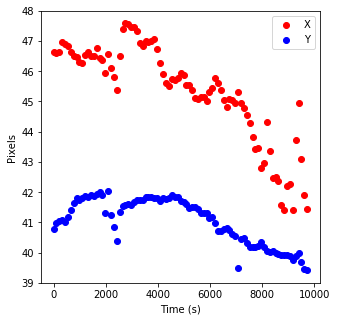

In [5]:
plt.figure(figsize=(5, 5))
plt.plot(my_time, centroids[:, 0], 'ro', label='X')
plt.plot(my_time, centroids[:, 1], 'bo', label='Y')
plt.xlabel('Time (s)')
plt.ylabel('Pixels')
plt.legend()

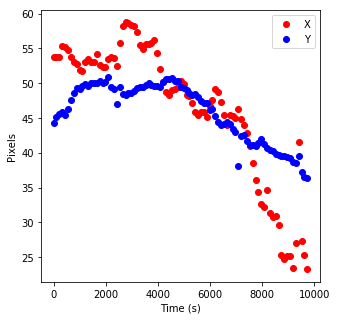

In [9]:
plt.figure(figsize=(5, 5))
plt.plot(my_time, backcenters[:, 0], 'ro', label='X')
plt.plot(my_time, backcenters[:, 1], 'bo', label='Y')
plt.xlabel('Time (s)')
plt.ylabel('Pixels')
plt.legend()

In [7]:
backcenters.shape

(89, 2)

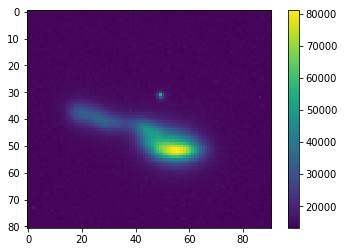

In [12]:
plt.imshow(data_sum)
plt.colorbar()

In [ ]:
plt.subplot(2, 1, 1)
